In [3]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
import pandas as pd
import seaborn as sns
import numpy as np

# Data

In [85]:
train = pd.read_csv('train.txt', header = None, delimiter = " ")
test = pd.read_csv('test.txt', header = None, delimiter = " ")

In [86]:
train

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,861813,-109689,-501867,299787,2720,-596749,95961,-43490,451227,994130,...,-947883,1065965,213248,1469971,-213545,2727628,6259280,-1042685,-138552,-6219662
1,734897,-109701,-501867,299787,2720,-596756,95864,46535,451227,994130,...,-111284,1065965,226791,1471724,-210350,2693318,6219628,-1042685,-138631,-4472740
2,893009,-109653,-501867,299787,2720,-596728,96258,-65515,451227,994130,...,-913285,1065965,195846,1490651,-175851,2704943,6223772,-1042685,-139484,-4250292
3,898311,-109683,-501867,299787,2720,-596745,96013,-69651,451227,994130,...,-1185096,1065965,183087,1508697,-142958,2759332,6305891,-1042685,-140297,-4055391
4,423466,-109710,-501867,299787,2720,-596761,95793,267483,451227,994130,...,-1579790,1065965,249500,1491797,-173762,2592164,6097935,-1042685,-139536,-3929017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,-1140045,-109666,-501867,299787,2720,-596736,96152,1376080,451227,994130,...,2213450,1065965,244103,1771122,335372,2083500,5497137,-1042685,-152122,28728629
1160,-1527101,-109679,-501867,299787,2720,-596743,96048,1650786,451227,994130,...,1275907,1065965,283033,1780077,351694,1949769,5332871,-1042685,-152526,29616679
1161,-1280786,-109702,-501867,299787,2720,-596757,95856,1475536,451227,994130,...,2233996,1065965,241648,1799090,386350,2093540,5526842,-1042685,-153383,30608872
1162,-908471,-109641,-501867,299787,2720,-596721,96364,1211354,451227,994130,...,1957978,1065965,175005,1834215,450374,2183722,5630057,-1042685,-154965,31885399


In [87]:
test

,0,1,2,3,4,5,6,7,8,9,...,419,420,421,422,423,424,425,426,427,428
0,-213410,-109667,-501867,299787,2720,-596736,96145,719579,451227,994130,...,-644531,1065965,276460,1562109,-45602,2322553,5756964,-1042685,-142704,6080887
1,-533970,-109671,-501867,299787,2720,-596738,96115,946796,451227,994130,...,977058,1065965,277545,1616070,52753,2233148,5655865,-1042685,-145136,13552510
2,-733427,-109690,-501867,299787,2720,-596750,95954,1087906,451227,994130,...,1039057,1065965,266441,1667183,145919,2212326,5646204,-1042685,-147439,17638943
3,-250862,-109705,-501867,299787,2720,-596758,95836,745704,451227,994130,...,-201972,1065965,265026,1585569,-2841,2373625,5838374,-1042685,-143761,7742576
4,-442390,-109682,-501867,299787,2720,-596745,96023,881138,451227,994130,...,1063974,1065965,219380,1687008,182054,2331963,5799991,-1042685,-148332,17711406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,-50290,-109679,-501867,299787,2720,-596743,96043,602522,451227,994130,...,1461331,1065965,157743,1711055,225885,2503093,6021912,-1042685,-149416,17999524
252,-54201,-109665,-501867,299787,2720,-596735,96166,605603,451227,994130,...,861698,1065965,174845,1686240,180654,2464992,5963628,-1042685,-148297,15783233
253,-877957,-109658,-501867,299787,2720,-596731,96219,1190965,451227,994130,...,486251,1065965,298052,1645138,105736,2095741,5483434,-1042685,-146445,16704809
254,53396,-109673,-501867,299787,2720,-596740,96096,529691,451227,994130,...,297146,1065965,212943,1610667,42906,2470527,5957241,-1042685,-144892,9247809


In [88]:
X_train, y_train = train.iloc[:, :-1], train.iloc[:, -1]
X_test, y_test = test.iloc[:, :-1], test.iloc[:, -1]

# Scorer

In [8]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

my_smape_score = make_scorer(smape)

# Ridge regression with least-squares

In [53]:
param_grid = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
}

In [54]:
clf = Ridge(solver="lsqr")
grid_search = GridSearchCV(clf, param_grid, n_jobs=10, scoring=my_smape_score)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 1e-15}

In [55]:
smape(y_test,
         grid_search.predict(X_test))

0.0019635862546062296

# SGDRegressor with LASSO regularization (l1)

## Normalization

In [76]:
def norm(d):
    return d/d.max()

In [89]:
train_norm = train.apply(norm, axis=1)
test_norm = test.apply(norm, axis=1)

In [78]:
X_train, y_train = train_norm.iloc[:, :-1], train_norm.iloc[:, -1]
X_test, y_test = test_norm.iloc[:, :-1], test_norm.iloc[:, -1]

In [90]:
X_train = train_norm.iloc[:, :-1]
X_test = test_norm.iloc[:, :-1]

## Train

In [91]:
param_grid = {
    'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]
}

In [92]:
clf = SGDRegressor(max_iter=2000, penalty='l1', loss='squared_loss')
grid_search = GridSearchCV(clf, param_grid, n_jobs=10)
grid_search.fit(X_train, y_train)
grid_search.best_params_

{'alpha': 0.01}

In [93]:
smape(y_test,
         grid_search.predict(X_test))

6.351621614940778

# Number of iterations

In [94]:
num_iter = []
score = []

for i in range(1, 2000, 20):
    reg = SGDRegressor(max_iter=i, alpha=0.0001, penalty='l1')
    reg.fit(X_train, y_train)
    num_iter.append(i)
    score.append(smape(y_test, reg.predict(X_test)))

/Users/konstantin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/konstantin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/konstantin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
/Users/konstantin/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_stochastic_gradient.py:1208: Convergence

<AxesSubplot:>

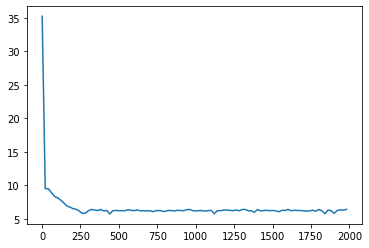

In [95]:
sns.lineplot(x=num_iter, y=score)